In [1]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization



In [2]:
#Import the dataset

dataset = pd.read_csv('Mall_Customers.csv')

#Exploratory Data Analysis
#As this is unsupervised learning so Label (Output Column) is unknown

dataset.head(10) 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
dataset.shape

(200, 5)

In [4]:
dataset.info() # tüm sütunlarda 200 giriş olduğu için eksik değer yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:

#2 degeri goz onune alacagiz(Annual income and Spending Score) 
X= dataset.iloc[:, [3,4]].values


In [7]:

from sklearn.cluster import KMeans
wcss=[]


for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


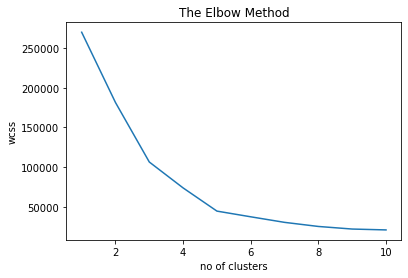

In [9]:
#Elbow mwtodu ile cluster saysini belirleme
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [10]:

#Model 
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)


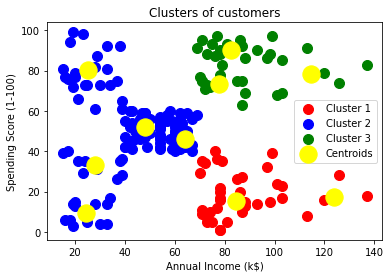

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [12]:
dataset['Cluster']= y_kmeans

In [13]:
dataset0=dataset[dataset['Cluster']==1]

In [14]:
dataset1=dataset[dataset['Cluster']==2]

In [15]:
dataset2=dataset[dataset['Cluster']==3]

In [16]:
dataset0['Age'].mean()

40.32520325203252

In [17]:
dataset0['Age'].max()

70

In [18]:
dataset1['Spending Score (1-100)'].mean()

82.12820512820512

In [19]:
dataset1['Spending Score (1-100)'].max()

97

In [20]:
dataset1['Annual Income (k$)'].mean()

86.53846153846153

In [21]:
dataset1['Annual Income (k$)'].max()

137

In [22]:
dataset2['Age'].mean()

nan

In [23]:
dataset2['Age'].max()

nan

In [24]:
dataset0['Spending Score (1-100)'].mean()

49.829268292682926

In [25]:
dataset0['Spending Score (1-100)'].max()

99

In [26]:
dataset0['Annual Income (k$)'].mean()

44.15447154471545

In [27]:
dataset0['Annual Income (k$)'].max()

69

In [28]:
dataset0['Age'].mean()

40.32520325203252